## Polarization in the circular basis: Poincare sphere

In this notebook we plot the spatial pattern traced out by the tip of the electric field vector for left and right circularly 
polarized light, plus also a superposition of left and right. The relative amplitude and phase of this left/right superposition
is characterised by two angles, $\theta$ and $\phi$, which can be represented by a point on the **Poincare sphere**.

We shall plot the Poincare vector to the point $(\theta,\phi)$ in an inset.

There are many ways in python to make visualisations in 3D. Here we have used pyvista. https://docs.pyvista.org/

As per usual the first cell imports all the packages we need.

<div class="interactive-start" onclick="initInteractiveCode()" title="This runs Python in your browser, allowing you local calculations">CLICK HERE TO ACTIVATE CODE CELLS</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
from io import BytesIO

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rc('text', usetex = True)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Now we define some functions to plot the electric fields. We use pyvista tube and arrow.

For left circular our $x$ and $y$ components are ${\cal E}_0\cos(kz-\omega t)$ and ${\cal E}_0\sin(kz-\omega t)$, respectively.
For right circular we change the sign of the $y$ component.

In [2]:
def left_tube(el, afreq, phi):
    num_pi=32
    zmax = num_pi * np.pi
    t = 0
    npts=200
    z = np.linspace(0, zmax, npts)    
    E0 = -50
    Ex =  E0*el*np.cos(afreq*(z-t)+0*np.pi/4)
    Ey =  E0*el*np.sin(afreq*(z-t)+0*np.pi/4)
    points = np.column_stack((Ex, 1.5*z, Ey))
    spline = pv.Spline(points, 1000)
    spline["scalars"] = np.arange(spline.n_points)
    tube_data = spline.tube(radius=1)
    return tube_data

def right_tube(er,afreq, phi):
    num_pi=32
    zmax = num_pi * np.pi
    t = 0
    npts=200
    z = np.linspace(0, zmax, npts)    
    E0 = -50
    Ex =  E0*er*np.cos(afreq*(z-t)+0*np.pi/4+phi)
    Ey =  -E0*er*np.sin(afreq*(z-t)+0*np.pi/4+phi)
    points = np.column_stack((Ex, 1.5*z, Ey))
    spline = pv.Spline(points, 1000)
    spline["scalars"] = np.arange(spline.n_points)
    tube_data = spline.tube(radius=1)
    return tube_data

def sum_tube(el, er, afreq, phi):
    num_pi=32
    zmax = num_pi * np.pi
    t = 0
    npts=200
    z = np.linspace(0, zmax, npts)    
    envelope=np.exp(-(z-zmax/2-t)**2/600)
    E0 = -50
    Exl =  E0*el*np.cos(afreq*(z-t))
    Eyl =  E0*el*np.sin(afreq*(z-t))   
    Exr =  E0*er*np.cos(afreq*(z-t)+0*np.pi/4+phi)
    Eyr =  -E0*er*np.sin(afreq*(z-t)+0*np.pi/4+phi)

    norm = np.sqrt(el**2+er**2)
    Ex = (Exl + Exr)/norm
    Ey = (Eyl + Eyr)/norm
    points = np.column_stack((Ex, 1.5 * z , Ey))
    spline = pv.Spline(points, 1000)
    spline["scalars"] = np.arange(spline.n_points)
    tube_data = spline.tube(radius=2)
    return tube_data

def E_left_arrow(el,afreq, phi):
    num_pi=32
    zmax = num_pi * np.pi
    t = 0
    E_arrow_size=50*el
    E_arrow_data = pv.Arrow(start=(0.0, 0.0, 0.0), direction=np.array([-np.cos(-afreq*t),0,-np.sin(-afreq*t)]),# * self.r,
                       tip_length=20/E_arrow_size, tip_radius=4/E_arrow_size, tip_resolution=20,
                       shaft_radius=2/E_arrow_size, shaft_resolution=20, scale=E_arrow_size)
    return E_arrow_data

def E_right_arrow(er,afreq, phi):
    num_pi=32
    zmax = num_pi * np.pi
    t = 0
    E_arrow_size=50*er
    E_arrow_data = pv.Arrow(start=(0.0, 0.0, 0.0), direction=np.array([-np.cos(-afreq*t+phi+0*np.pi/4),0,np.sin(-afreq*t+phi+0*np.pi/4)]),# * self.r,
                       tip_length=20/E_arrow_size, tip_radius=4/E_arrow_size, tip_resolution=20,
                       shaft_radius=2/E_arrow_size, shaft_resolution=20, scale=E_arrow_size)
    return E_arrow_data

These two functions create all the data for the polarization plot and the Poincare sphere.

In [3]:
def PNG_data(Theta,Phi):
    #    p=pv.Plotter(shape=(1, 1),multi_samples=1,window_size=(800,800),off_screen=True,notebook=False)
    afreq = 0.2
    relative_phase = Phi - 0 *np.pi

    el= np.cos(Theta/2)
    er = np.sin(Theta/2)
    p.add_mesh(left_tube(el,afreq, relative_phase), smooth_shading=True, color='blue', opacity=0.25, show_scalar_bar=False)
    p.add_mesh(right_tube(er,afreq, relative_phase), smooth_shading=True, color='red', opacity=0.25, show_scalar_bar=False)
    p.add_mesh(sum_tube(el,er,afreq, relative_phase), smooth_shading=True, color='green', opacity=0.5, show_scalar_bar=False)

    z_arrow_size=175
    z_arrow=pv.Arrow(start=(0.0, 0.0, 0.0), direction=np.array([0,1,0]),# * self.r,
                           tip_length=10/z_arrow_size, tip_radius=2/z_arrow_size, tip_resolution=40,
                           shaft_radius=1/z_arrow_size, shaft_resolution=40, scale=z_arrow_size)
    p.add_mesh(z_arrow, opacity=1.0, color='black', smooth_shading=True)

    x_arrow_size= 100
    x_arrow=pv.Arrow(start=(0.0, 0.0, 0.0), direction=np.array([-1,0,0]),# * self.r,
                           tip_length=10/x_arrow_size, tip_radius=2/x_arrow_size, tip_resolution=40,
                           shaft_radius=1/x_arrow_size, shaft_resolution=20, scale=x_arrow_size)
    p.add_mesh(x_arrow, opacity=1.0, color='black', smooth_shading=True)

    y_arrow_size= 100
    y_arrow=pv.Arrow(start=(0.0, 0.0, 0.0), direction=np.array([0,0,1]),# * self.r,
                           tip_length=10/y_arrow_size, tip_radius=2/y_arrow_size, tip_resolution=40,
                           shaft_radius=1/y_arrow_size, shaft_resolution=20, scale=y_arrow_size)
    p.add_mesh(y_arrow, opacity=1.0, color='black', smooth_shading=True)

    p.add_mesh(E_left_arrow(el,afreq, relative_phase), opacity=1.0, color='blue', smooth_shading=True)
    p.add_mesh(E_right_arrow(er,afreq, relative_phase), opacity=1.0, color='red', smooth_shading=True)

#    p.enable_depth_peeling(10)
    p.camera_position = [(420, 300, 40),(35, 90, 30.0),(0.0, 0.0, 1.0)] 
    p.set_background("white", top="white")
    png_output = BytesIO()    
    return png_output

def BS_data(Theta,Phi):
    u = np.sin(Theta) * np.cos(Phi)
    v = np.sin(Theta) * np.sin(Phi)
    w = np.cos(Theta)
    
    num = 50
    theta = np.linspace(-1 * np.pi, 1 * np.pi, num)
    r = 3
    phi = 0 * np.pi / 60

    z = 0 * r * np.cos(theta)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    rpts = np.column_stack((x, y, z))
    spline = pv.Spline(rpts, 1000)
    rxy_tube = spline.tube(radius=0.03)

    z = r * np.cos(theta)
    x = r * np.sin(theta) * np.cos(phi - np.pi / 2)
    y = r * np.sin(theta) * np.sin(phi - np.pi / 2)
    rpts = np.column_stack((x, y, z))
    spline = pv.Spline(rpts, 1000)
    rxz_tube = spline.tube(radius=0.03)

    z = r * np.cos(theta)
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    rpts = np.column_stack((x, y, z))
    spline = pv.Spline(rpts, 1000)
    ryz_tube = spline.tube(radius=0.03)

    # add sphere
    big = pv.Sphere(center=(0, 0, 0), radius=r)
    p.add_mesh(big, opacity=0.4,
                    color="w", specular=0.85, smooth_shading=True)

    # add cross-sections
    p.add_mesh(rxy_tube, opacity=0.1, smooth_shading=True, color=cDUkk)
    p.add_mesh(rxz_tube, opacity=0.1, smooth_shading=True, color=cDUkk)
    p.add_mesh(ryz_tube, opacity=0.1, smooth_shading=True, color=cDUkk)
    
    p.set_background(cDUsky, top="white")
    p.camera_position = [(14, 4.0, 4.0),
                            (0.0, 0.0, 0.0),
                            (0.0, 0.0, 1)]
    
    addAxisArrow(1,0,0,cDUo)
    addAxisArrow(0,1,0,cDUy)
    addAxisArrow(0,0,1,cDUb)
    addStateArrow(u,v,w)
    png_output = BytesIO()
    return png_output

def addAxisArrow(x,y,z,color):
    r=3
    length = 1.25*np.sqrt(x*x + y*y + z*z)
    arrow=pv.Arrow(start=(0.0, 0.0, 0.0), direction=np.array([x,y,z]) * r,
                   tip_length=0.15/length, tip_radius=0.05/length, tip_resolution=20,
                   shaft_radius=0.025/length, shaft_resolution=20, scale=length * r)
    p.add_mesh(arrow, opacity=1.0, color=color, smooth_shading=True)

def addStateArrow(x,y,z):
    r=3
    length = 1.0*np.sqrt(x*x + y*y + z*z)
    arrow=pv.Arrow(start=(0.0, 0.0, 0.0), direction=np.array([x,y,z]) * r,
                   tip_length=0.2, tip_radius=0.1, tip_resolution=20,
                   shaft_radius=0.05, shaft_resolution=20, scale=length * r)
    p.add_mesh(arrow, opacity=1.0, color='Green', smooth_shading=True)

We define some colours to use.

In [4]:
#: Durham colour scheme
cDUp = "#7E317B"  # Palatinate Purple
cDUpp =  "#D8ACF4"  # Light purple

cDUb = "#006388"  # Blue
cDUbb = "#91B8BD"  # Mid Blue
cDUbbb = "#C4E5FA"  # Light Blue
cDUbbbb = "#00AEEF"

cDUsky = "#A5C8D0"  # sky blue

cDUo = "#9FA161"  # Olive Green

cDUr = "#AA2B4A"  # Red
cDUrr = "#BE1E2D"
cDUy = "#E8E391" #  Yellow

cDUp = "#C43B8E" # Pink

cDUk = "#231F20"  # Black
cDUkk = "#002A41" # ink

cDUggg = "#CFDAD1"  # Near White/L. Grey
cDUgg = "#968E85"  # Warm Grey
cDUg = "#6E6464"  # midgrey

Finally we make a plot. The key input parameters are Theta and Phi. You should check that left (blue) 
and right (red) have the correct
handedness, and play around with different values of Theta and Phi to generate interesting superpositions.
What values are needed to create linearly polarized light aligned on the $+45$ degree axis?

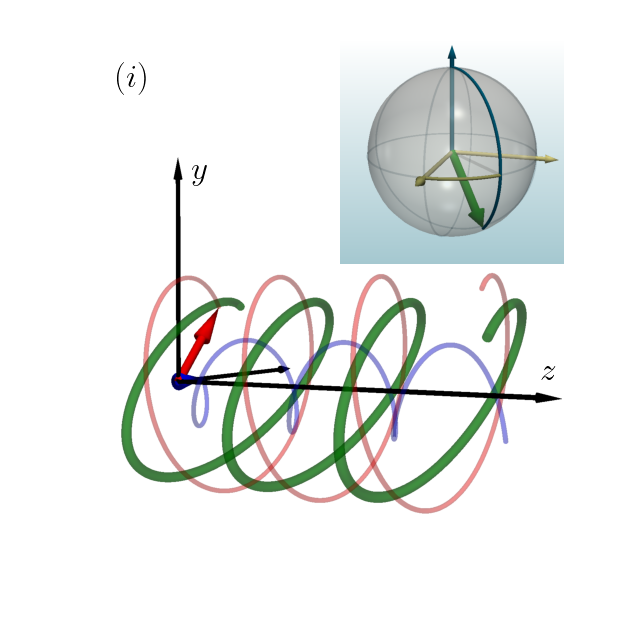

In [5]:
eps = 1e-8

Theta = 3.* np.pi/4 + eps
Phi = 1 * np.pi/4

fig, (ax1) = plt.subplots(1,1,figsize=(8, 8))

p=pv.Plotter(shape=(1, 1),multi_samples=1,window_size=(1600,1600),off_screen=True,notebook=False)

png_output1 = PNG_data(Theta,Phi)
p.show(screenshot=png_output1)
ax1.imshow(p.image)
ax1.text(470,440,'$y$', fontsize = 24)
ax1.text(1380,960,'$z$', fontsize = 24)
ax1.text(275,200,'$(i)$', fontsize = 24)
ax1.set_axis_off()
ax1ins = inset_axes(ax1,width="50%", height="75%",
                   bbox_to_anchor=(.525, .485, .725, .725),
                   bbox_transform=ax1.transAxes, loc=3)

p=pv.Plotter(shape=(1, 1),multi_samples=1,window_size=(600,600),off_screen=True,notebook=False)

num = 50
theta = np.linspace(0, Theta, num)
r = 3
z = r * np.cos(theta)
x = r * np.sin(theta) * np.cos(Phi)
y = r * np.sin(theta) * np.sin(Phi)
rpts = np.column_stack((x, y, z))
spline = pv.Spline(rpts, 1000)
theta_tube = spline.tube(radius=0.05)
p.add_mesh(theta_tube, opacity=1.0, smooth_shading=True, color=cDUb)

theta = np.linspace(Theta, np.pi/2, num)
r = 3
z = r * np.cos(theta)
x = r * np.sin(theta) * np.cos(Phi)
y = r * np.sin(theta) * np.sin(Phi)
rpts = np.column_stack((x, y, z))
spline = pv.Spline(rpts, 1000)
theta_tube = spline.tube(radius=0.05)
p.add_mesh(theta_tube, opacity=0.1, smooth_shading=True, color=cDUk)

r = np.linspace(0, 3, num)
theta = np.pi/2
z = r * np.cos(theta)
x = r * np.sin(theta) * np.cos(Phi)
y = r * np.sin(theta) * np.sin(Phi)
rpts = np.column_stack((x, y, z))
spline = pv.Spline(rpts, 1000)
theta_tube = spline.tube(radius=0.05)
p.add_mesh(theta_tube, opacity=0.1, smooth_shading=True, color=cDUk)


phi = np.linspace(0, Phi, num)
r = 3
theta = np.pi/2
z = 0 * r * np.cos(phi)
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
rpts = np.column_stack((x, y, z))
spline = pv.Spline(rpts, 1000)
phi_tube = spline.tube(radius=0.05)
p.add_mesh(phi_tube, opacity=1.0, smooth_shading=True, color=cDUo)

png_output2 = BS_data(Theta,Phi)
p.show(screenshot=png_output2)

ax1ins.imshow(p.image)
#ax1ins.text(500,400,'$y$', fontsize = 32)
#ax1ins.text(1400,960,'$z$', fontsize = 32)
#ax1ins.text(100,400,'$(ii)$', fontsize = 32)
ax1ins.set_axis_off()

In [6]:
fig.savefig('Pol_Poincare_test.png', dpi=600, facecolor='white', edgecolor='white')